In [1]:
!pip install pandas numpy matplotlib seaborn

  Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 1.9 MB/s  0:00:08m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.4 MB/s  0:00:03 eta 0:00:01
Using cached seaborn-0.13.2-py3-none-a

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Model': ['FCN', 'Bidir LSTM', 'BERT', 'BERTweet', 'DeBERTa', 'distilBERT', 'ELECTRA', 'RoBERTa', 'T5', 'Kaggle best'],
    'Accuracy': [0.660, 0.786, 0.840, 0.841, 0.829, 0.832, 0.839, 0.834, 0.775, 0.852]
}

df = pd.DataFrame(data).sort_values(by='Accuracy', ascending=False)


/tmp/ipykernel_37586/343624569.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df[df['Model'] != 'Kaggle best'], x='Model', y='Accuracy', palette=color_map)


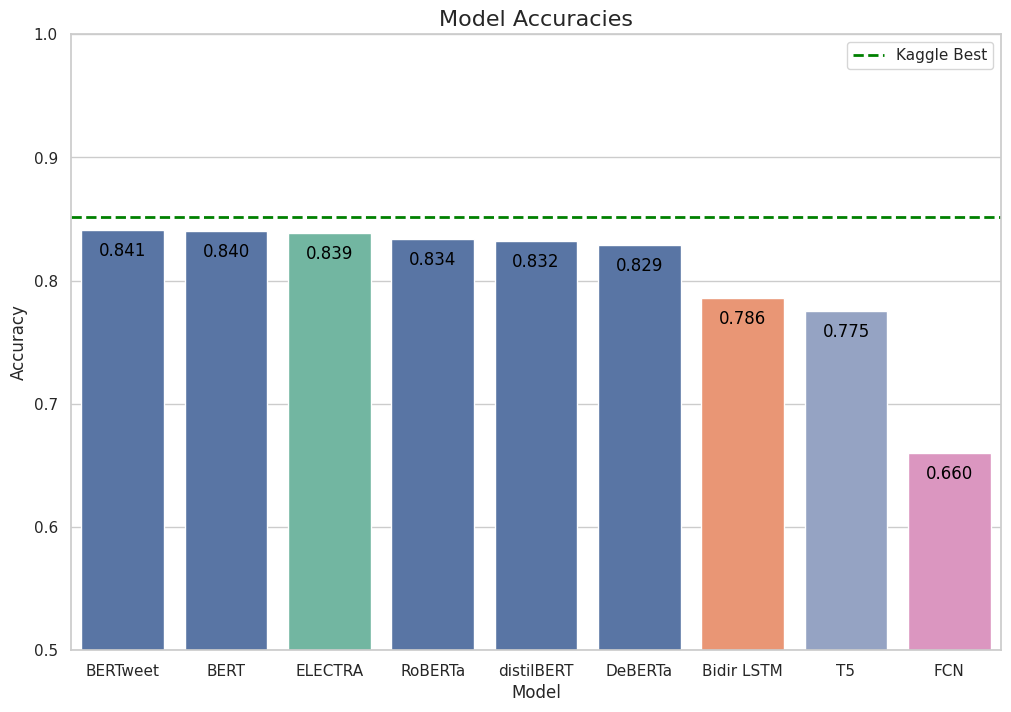

In [28]:
# Plot only the accuracies for each model (Grouped Bar Chart with Accuracy only)
# Use a presentation-friendly color palette and set BERT variants to the same color by checking 'BERT' in the name
plt.figure()
# Define custom colors: all models with 'BERT' in the name in blue, others in Set2 palette
base_palette = sns.color_palette('Set2', n_colors=len(df[df['Model'] != 'Kaggle best']))
color_map = []
for model in df[df['Model'] != 'Kaggle best']['Model']:
    if 'BERT' in model.upper():
        color_map.append('#4C72B0')  # blue for BERT variants
    else:
        color_map.append(base_palette.pop(0))
# Draw the barplot with custom colors
ax = sns.barplot(data=df[df['Model'] != 'Kaggle best'], x='Model', y='Accuracy', palette=color_map)
plt.title('Model Accuracies', fontsize=16)
plt.ylim(0.5, 1.0) # Zoom in on the relevant range
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -15), 
                textcoords = 'offset points', color='black')
plt.ylabel('Accuracy')
# Add horizontal line for Kaggle best in green
kaggle_best_acc = df[df['Model'] == 'Kaggle best']['Accuracy'].values[0]
plt.axhline(y=kaggle_best_acc, color='green', linestyle='--', linewidth=2, label='Kaggle Best')
plt.legend()
plt.show()